# Neural Network for Fashion MNIST

### Fashion MNIST

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. We intend Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

Here's an example how the data looks (each class takes three-rows):

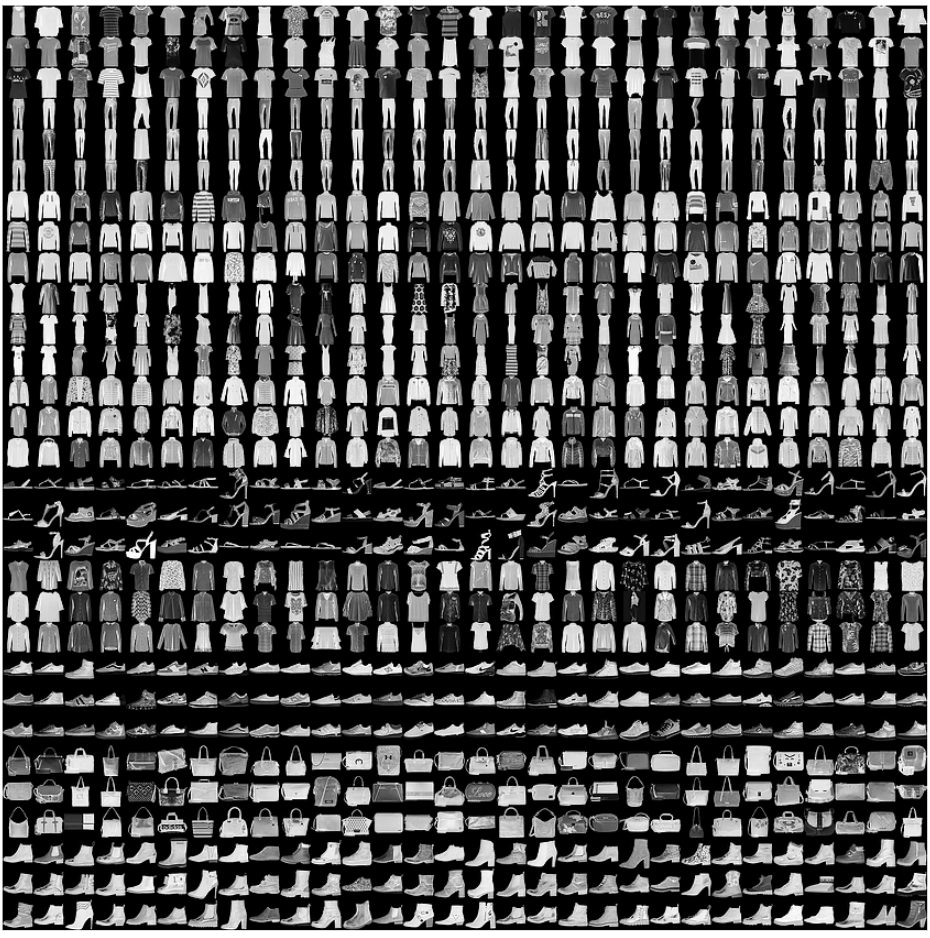

#### Importing required libraries
We build this neural network entirely from scratch and rely only on numpy
We use keras only to load the Fashion MNIST Dataset

In [257]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
from keras.datasets import fashion_mnist
import random

### Loading the data
.load_data gets you the test_train split so we don't need to do that separately

In [258]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
m_train = X_train.shape[0]
m_test = X_test.shape[0]
labels = { 0: 'T-shirt/top'
          ,1: 'Trouser'
          ,2: 'Pullover'
          ,3: 'Dress'
          ,4: 'Coat'
          ,5: 'Sandal'
          ,6: 'Shirt'
          ,7: 'Sneaker'
          ,8: 'Bag'
          ,9: 'Ankle boot'}

### A peek at the shape of our data

In [447]:
print("X_train shape: " + str(X_train.shape))
print("y_train shape: " + str(y_train.shape))
print("X_test shape: " + str(X_test.shape))
print("y_test shape: " + str(y_test.shape))

X_train shape: (60000, 784)
y_train shape: (60000,)
X_test shape: (10000, 784)
y_test shape: (10000,)


As we can see, the images are 28x28 pixels.

Size of train data = 60K

Size of test data = 10K

### A quick look at our data

In [448]:
print("Data Values (Pixel Activation): " + str(np.min(X_train)) + " - " + str(np.max(X_train)))
print("Label Values: ")
print(set(list(y_train)))

Data Values (Pixel Activation): 0 - 255
Label Values: 
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


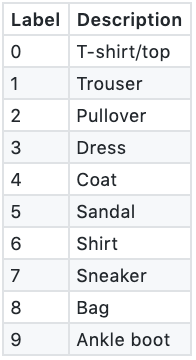

Integers 0 to 9 represent the lables as show above.

255 is the grayscale value which signifies the activation number for the pixel.

### Random image for each label
Getting a better idea of image-label

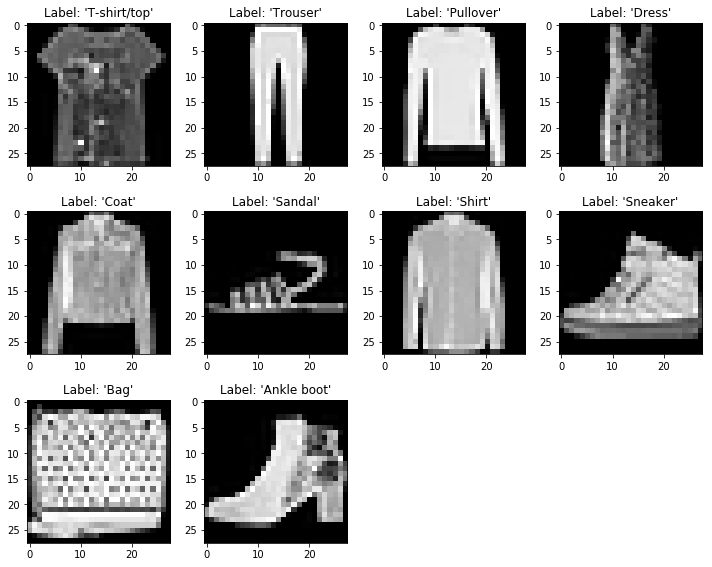

In [449]:
for i in range(10):
    idxs = np.where(y_train==i)
    plt.subplot(3,4,i+1)
    plt.imshow(X_train[idxs[0][random.randint(0, len(idxs[0]))]].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Label: "+repr(labels[i]))
    plt.tight_layout()

#### Subsampling the dataset
Our data is quite large and so we subsample the data. Running algorithms which require the full data set for each update can be expensive when the data is large. In order to scale inferences, we can do data subsampling, i.e., update inference using only a subsample of data at a time.

In [450]:
m_train = 59000
m_validation = 1000

mask = list(range(m_train, m_train + m_validation))
X_val = X_train[mask]
y_val = y_train[mask]

mask = list(range(m_train))
X_train = X_train[mask]
y_train = y_train[mask]

mask = list(range(m_test))
X_test = X_test[mask]
y_test = y_test[mask]

### Reshaping our data

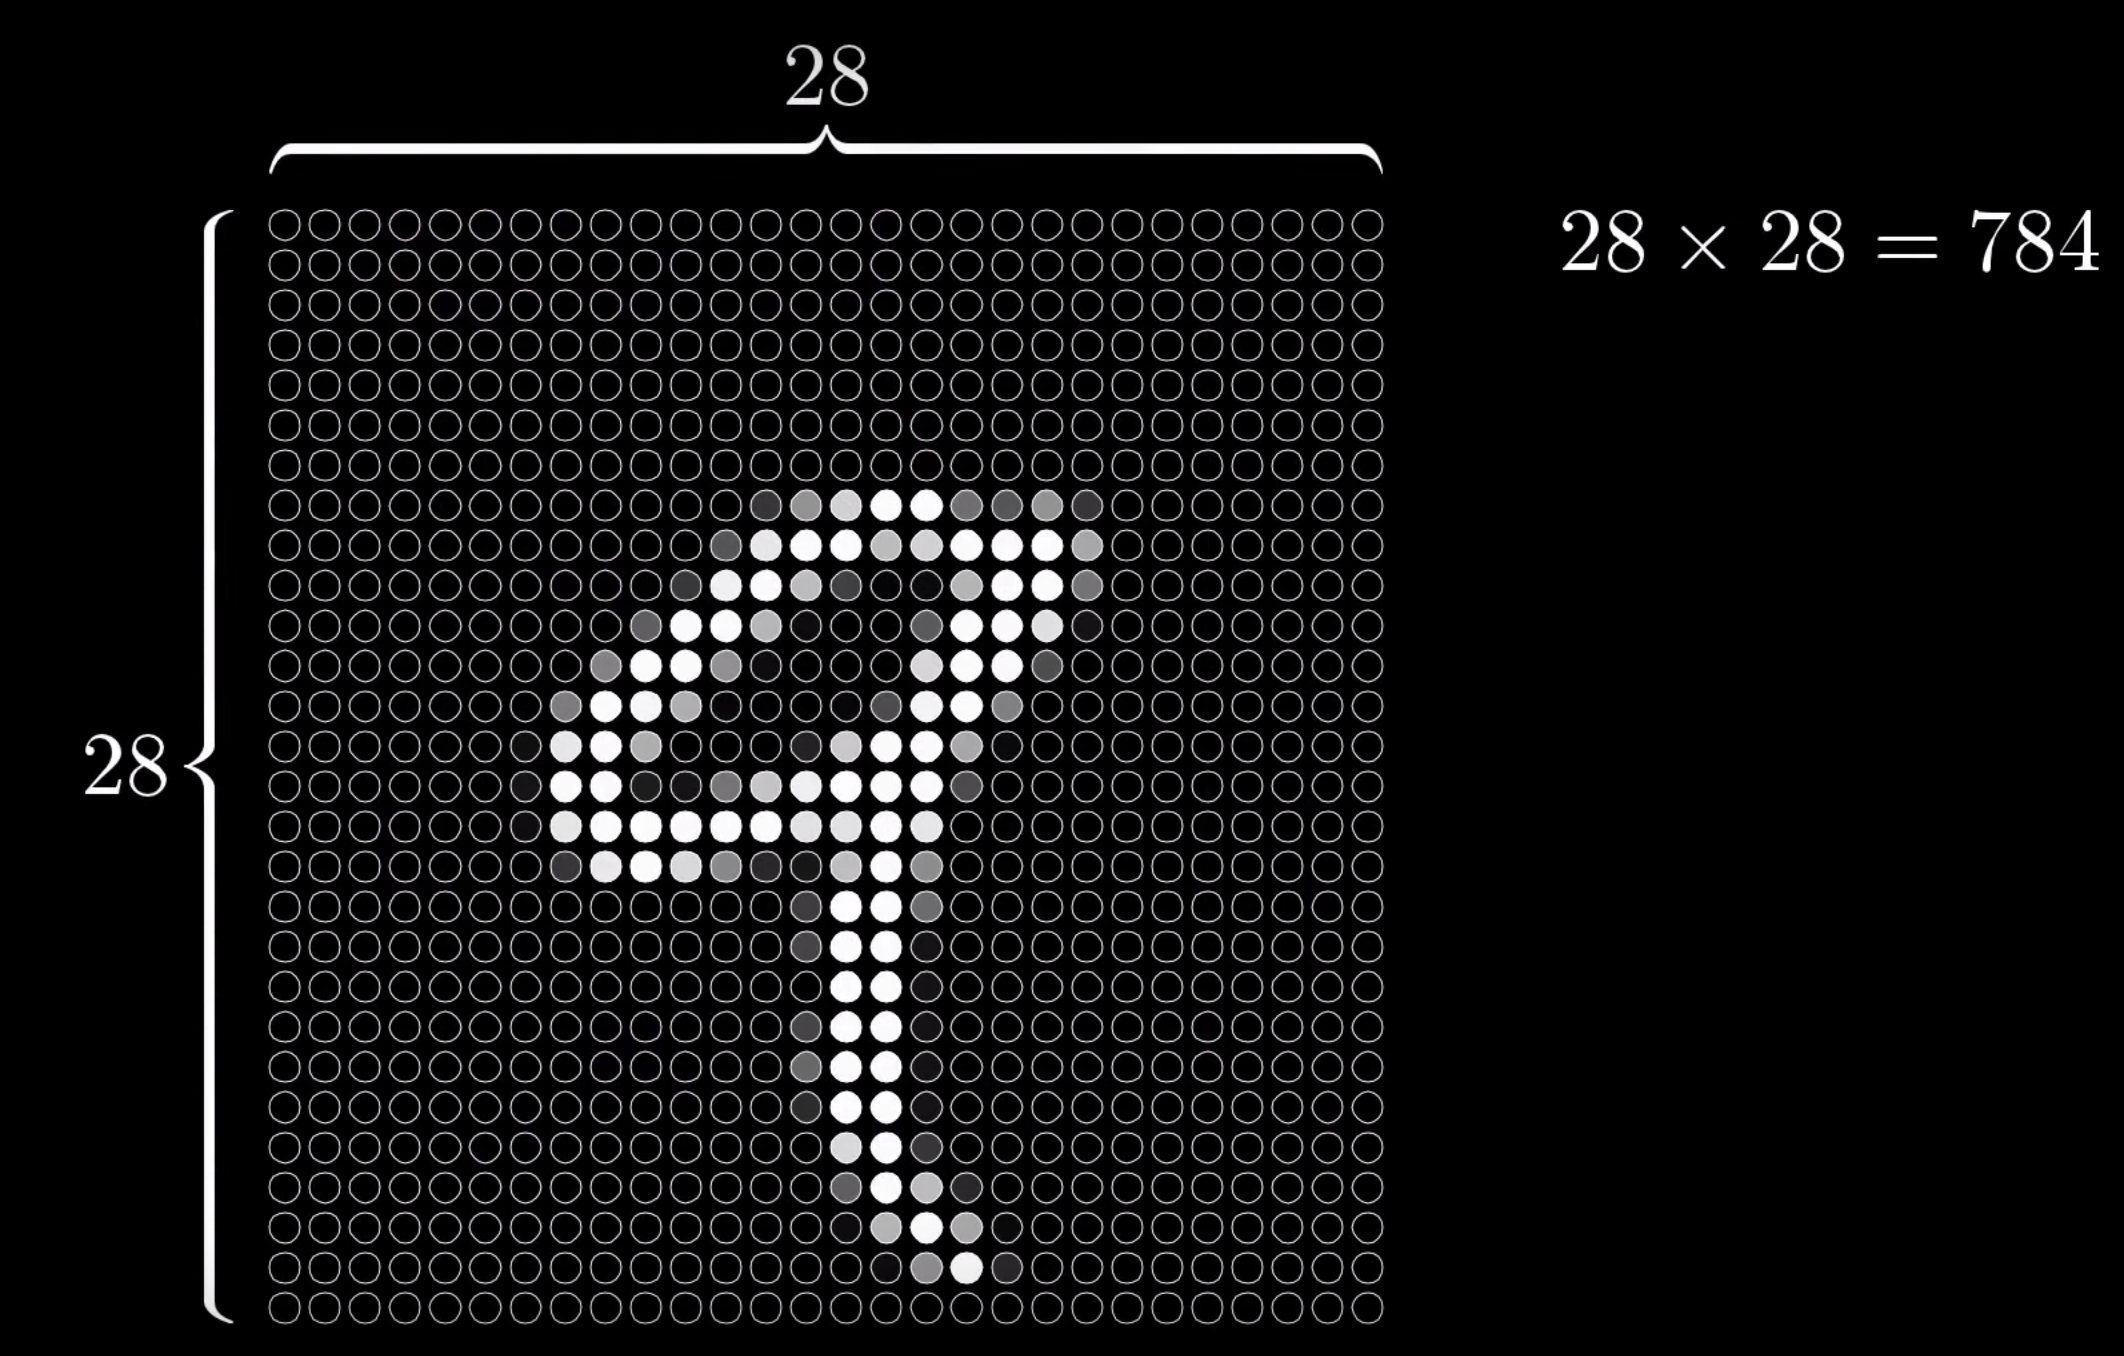



Each image is 28x28 pixels = 784 pixels. Each of these pixels has an activation number between 0 to 255, with 0 representing a black pixel, 255 a white pixel, and any value (0, 255) representing some shade between black and white. These 784 pixels will form our first layer and each connection will get assigned a weight. We therefore need to resize it to (784 x 1) from (28 x 28).



In [451]:
# Reshape data to rows
X_train = X_train.reshape(m_train, -1)
X_val = X_val.reshape(m_validation, -1)
X_test = X_test.reshape(m_test, -1)

In [452]:
print("X_train shape: " + str(X_train.shape))
print("y_train shape: " + str(y_train.shape))
print("X_val shape: " + str(X_val.shape))
print("y_val shape: " + str(y_val.shape))
print("X_test shape: " + str(X_test.shape))
print("y_test shape: " + str(y_test.shape))

X_train shape: (59000, 784)
y_train shape: (59000,)
X_val shape: (1000, 784)
y_val shape: (1000,)
X_test shape: (10000, 784)
y_test shape: (10000,)


## The Neural Network

### 2 Hidden Layer Neural Network

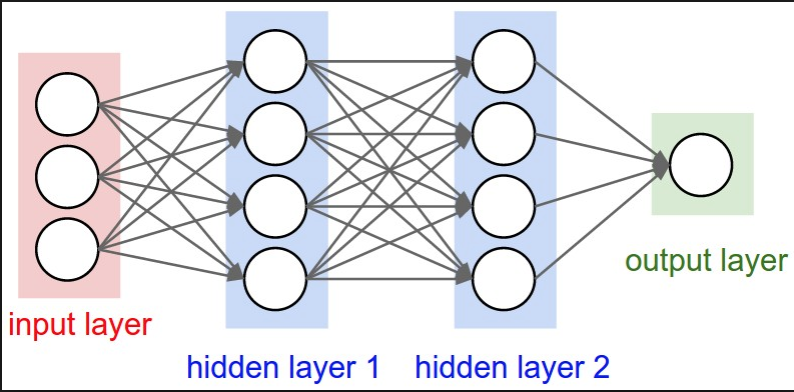

### Weights and Biases
W1, weights in the first layer, has the dimensions 60000x10 because we there are 60000x10 connections (all nodes in the input layer connected to each node in the first layer)
The weight is assigned to each connection therefore the dimension 60000x10

B1, bias for the first layer, will have the dimension 10x1 because each neuron in the layer gets its own bias.

W2, weights in the second layer, has the dimension 10x10 because there are 10 neurons in the first layer and 10 neurons in the second layer. 

Just like B1, B2 also has a dimension of 10x1.

### ReLU 
The Rectified Linear Unit is the most commonly used activation function in deep learning models. The function returns 0 if it receives any negative input, but for any positive value  x  it returns that value back. So it can be written as  f(x)=max(0,x) .

Graphically it looks like this

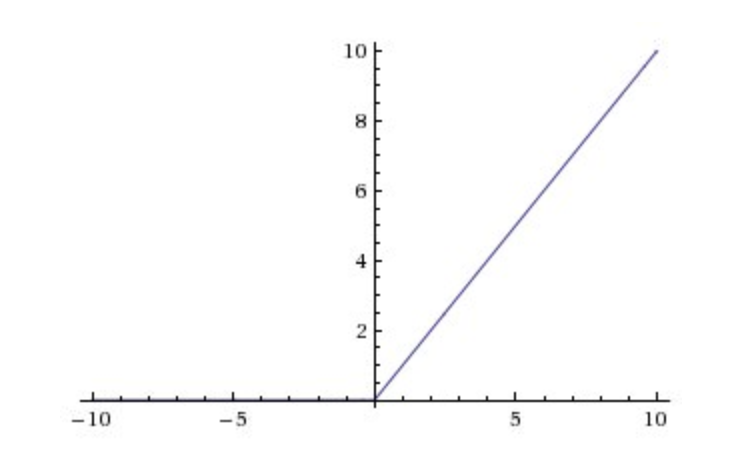

## Training the neural network
Training the Neural Network is process of fine-tuning the weights and biases from the input data. Finding the right values for the weights and biases determines the strength of the predictions and this is the most critical step of the neural network.

The following 3 steps broadly define training the neural network:
1. Feedforward
2. Loss function - Softmax
3. Backpropagation

### 1. Feedforward
1. Calculate the weighted sum of activations and add bias, B1 to it
2. Pass that to the activation function ReLU
3. Use the returned activation values for the neurons in the first layer to calculate the weighted sum of activations of the neurons in the second layer and add bias, B2 to it

### 2. Loss Function - Softmax
This is the crux of our loss function and we use the softmax loss function

    The softmax function is a function that takes as input a vector of K real numbers, and normalizes it into a probability distribution consisting of K probabilities. That is, prior to applying softmax, some vector components could be negative, or greater than one; and might not sum to 1; but after applying softmax, each component will be in the interval 0,1), and the components will add up to 1, so that they can be interpreted as probabilities. Furthermore, the larger input components will correspond to larger probabilities.

### 3. Backpropagation
Now that we’ve measured the error of our prediction (loss), we need to find a way to propagate the error back, and to update our weights and biases.

In order to know the appropriate amount to adjust the weights and biases by, we need to know the derivative of the loss function with respect to the weights and biases.

Calculating the derivative of the loss function was beyond my capabilities and luckily I found a kernel on Kaggle that was already had the derivative implemented. Please look in the sources section to find the link.

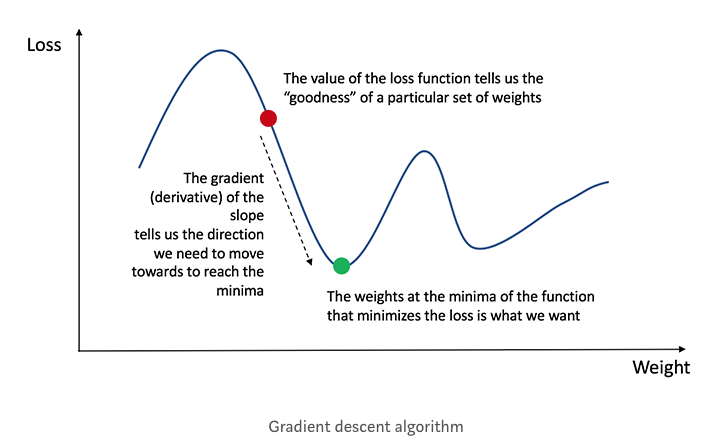

The gradient descent tells us the direction we need to move in to reach the minima. 

In [453]:
class TwoLayerNet(object):    
    
    def __init__(self, num_images, num_nodes_h_layer, no_of_labels, std=1e-4): 
        
        self.wb_dict = {}    
        
        self.wb_dict['W1'] = std * np.random.randn(num_images, num_nodes_h_layer)   
        self.wb_dict['b1'] = np.zeros((1, num_nodes_h_layer))    
        self.wb_dict['W2'] = std * np.random.randn(num_nodes_h_layer, no_of_labels)   
        self.wb_dict['b2'] = np.zeros((1, no_of_labels))
    
    def get_values(self, wb_dict, X):
        W1, b1 = self.wb_dict['W1'], self.wb_dict['b1']
        W2, b2 = self.wb_dict['W2'], self.wb_dict['b2']
        N, D = X.shape
        return (W1, b1, W2, b2, N, D)
    
    def feed_forward(self, wb_dict, X):
        (W1, b1, W2, b2, N, D) = self.get_values(wb_dict, X)
        h1 = ReLU(np.dot(X, W1) + b1)      
        scores = np.dot(h1, W2) + b2 
        return (h1, scores)
    
    def compute_softmax(self, wb_dict, X, y, scores, reg):
        (W1, b1, W2, b2, N, D) = self.get_values(wb_dict, X)
        scores_max = np.max(scores, axis=1, keepdims=True)    
        exp_scores = np.exp(scores - scores_max)              
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)    
        correct_logprobs = -np.log(probs[range(N), y])        
        data_loss = np.sum(correct_logprobs) / N
        reg_loss = 0.5 * reg * np.sum(W1*W1) + 0.5 * reg * np.sum(W2*W2)
        loss = data_loss + reg_loss
        return (loss, probs)
    
    def backpropagation(self, wb_dict, probs, X, y, h1, reg):

        (W1, b1, W2, b2, N, D) = self.get_values(wb_dict, X)
        grads = {}
        dscores = probs                                 
        dscores[range(N), y] -= 1
        dscores /= N
        dW2 = np.dot(h1.T, dscores)                     
        db2 = np.sum(dscores, axis=0, keepdims=True)    
        dh1 = np.dot(dscores, W2.T)                     
        dh1[h1 <= 0] = 0
        dW1 = np.dot(X.T, dh1)                          
        db1 = np.sum(dh1, axis=0, keepdims=True)        
        dW2 += reg * W2
        dW1 += reg * W1
        grads['W1'] = dW1
        grads['b1'] = db1
        grads['W2'] = dW2
        grads['b2'] = db2

        return grads
    
    def get_random_minibatch(self, num_train, batch_size, X, y):
        sample_index = np.random.choice(num_train, batch_size, replace=True)   
        X_batch = X[sample_index, :]          
        y_batch = y[sample_index]   
        return (X_batch, y_batch)
    
    def update_wb_dict(self, v_t, wb_dict, mu, grads, learning_rate):
        (v_W2, v_b2, v_W1, v_b1) = v_t
        v_W2 = mu * v_W2 - learning_rate * grads['W2']    
        self.wb_dict['W2'] += v_W2   
        v_b2 = mu * v_b2 - learning_rate * grads['b2']    
        self.wb_dict['b2'] += v_b2   
        v_W1 = mu * v_W1 - learning_rate * grads['W1']    
        self.wb_dict['W1'] += v_W1   
        v_b1 = mu * v_b1 - learning_rate * grads['b1']  
        self.wb_dict['b1'] += v_b1
        
        return (v_t, wb_dict)
    
    def loss(self, X, y=None, reg=0.0):  
        
        # Step 1: Feedforward
        (h1, scores) = self.feed_forward(self.wb_dict, X)
                
        #Step 2: Calculating Loss using Softmax    
        (loss, probs) = self.compute_softmax(self.wb_dict, X, y, scores, reg)
        
        #Step 3: Backpropagation
        grads = self.backpropagation(self.wb_dict, probs, X, y, h1, reg)
        
        return (loss, grads)

    def train(self, X, y, X_val, y_val, learning_rate=1e-3, 
               learning_rate_decay=0.95, reg=1e-5, mu=0.9, num_epochs=10, 
               mu_increase=1.0, batch_size=200, verbose=False):   
        
        num_train = X.shape[0]
        iterations_per_epoch = max(int(num_train / batch_size), 1)
        
        # Use SGD to optimize the parameters in self.model
        v_W2, v_b2 = 0.0, 0.0
        v_W1, v_b1 = 0.0, 0.0
        v_t = (v_W2, v_b2, v_W1, v_b1)
        loss_history = []
        train_acc_history = []
        val_acc_history = []

        for it in range(1, num_epochs * iterations_per_epoch + 1):   
            X_batch = None   
            y_batch = None 
                      
            (X_batch, y_batch) = self.get_random_minibatch(num_train, batch_size, X, y)
            
            (loss, grads) = self.loss(X_batch, y=y_batch, reg=reg) 
            loss_history.append(loss)
            
            (v_t, wb_dict) = self.update_wb_dict(v_t, self.wb_dict, mu, grads, learning_rate)
            
            if verbose and it % iterations_per_epoch == 0:    
                epoch = it / iterations_per_epoch    
                train_acc = (self.predict(X_batch) == y_batch).mean()    
                val_acc = (self.predict(X_val) == y_val).mean()    
                train_acc_history.append(train_acc)    
                val_acc_history.append(val_acc)    
                print("epoch %d / %d: loss %f, train_acc: %f, val_acc: %f" % 
                                    (epoch, num_epochs, loss, train_acc, val_acc))
                
                learning_rate *= learning_rate_decay    
                mu *= mu_increase

        return {   
            'loss_history': loss_history,   
            'train_acc_history': train_acc_history,   
            'val_acc_history': val_acc_history,
        }

    def predict(self, X):    
        
        y_pred = None   
        h1 = ReLU(np.dot(X, self.wb_dict['W1']) + self.wb_dict['b1'])    
        scores = np.dot(h1, self.wb_dict['W2']) + self.wb_dict['b2']    
        y_pred = np.argmax(scores, axis=1)    
        return y_pred

def ReLU(x):    
     
    return np.maximum(0, x)

In [455]:
num_images = X_train.shape[1]
num_nodes_h_layer = 10
no_of_labels = 10
net = TwoLayerNet(num_images, num_nodes_h_layer, no_of_labels)

stats = net.train(X_train, y_train, X_val, y_val,
            num_epochs=10, batch_size=1024,
            learning_rate=7.5e-4, learning_rate_decay=0.95,
            reg=1.0, verbose=False)

val_acc = (net.predict(X_val) == y_val).mean()

In [456]:
y_pred = net.predict(X_test)

In [457]:
wrong_label_idxs = []
wrong_labels = {}
for idx, pred in enumerate(y_pred):
    if pred != y_test[idx]:
        wrong_label_idxs.append(idx)
        wrong_labels[idx] = pred

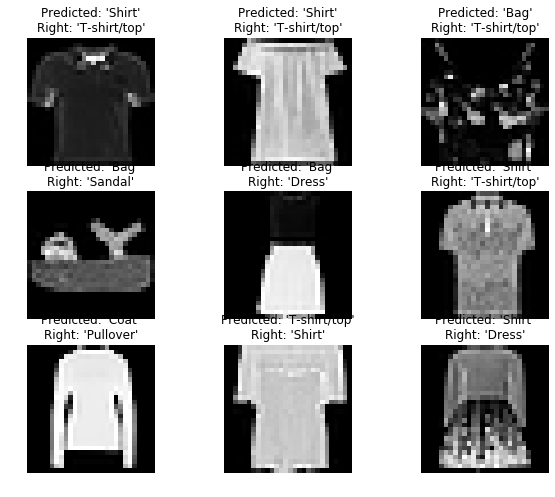

In [490]:
for j in range(1,10):
    idx = random.choice(wrong_label_idxs)
    wrong_img = (X_test[idx]).reshape(28,28)
    plt.subplot(3, 3, j, sharex=ax1, frameon=False)
    plt.imshow(wrong_img, cmap='gray', interpolation='none')
    plt.title("Predicted: "+repr(labels[wrong_labels[idx]])+"\nRight: "+repr(labels[y_test[idx]]))
    plt.axis('off') 